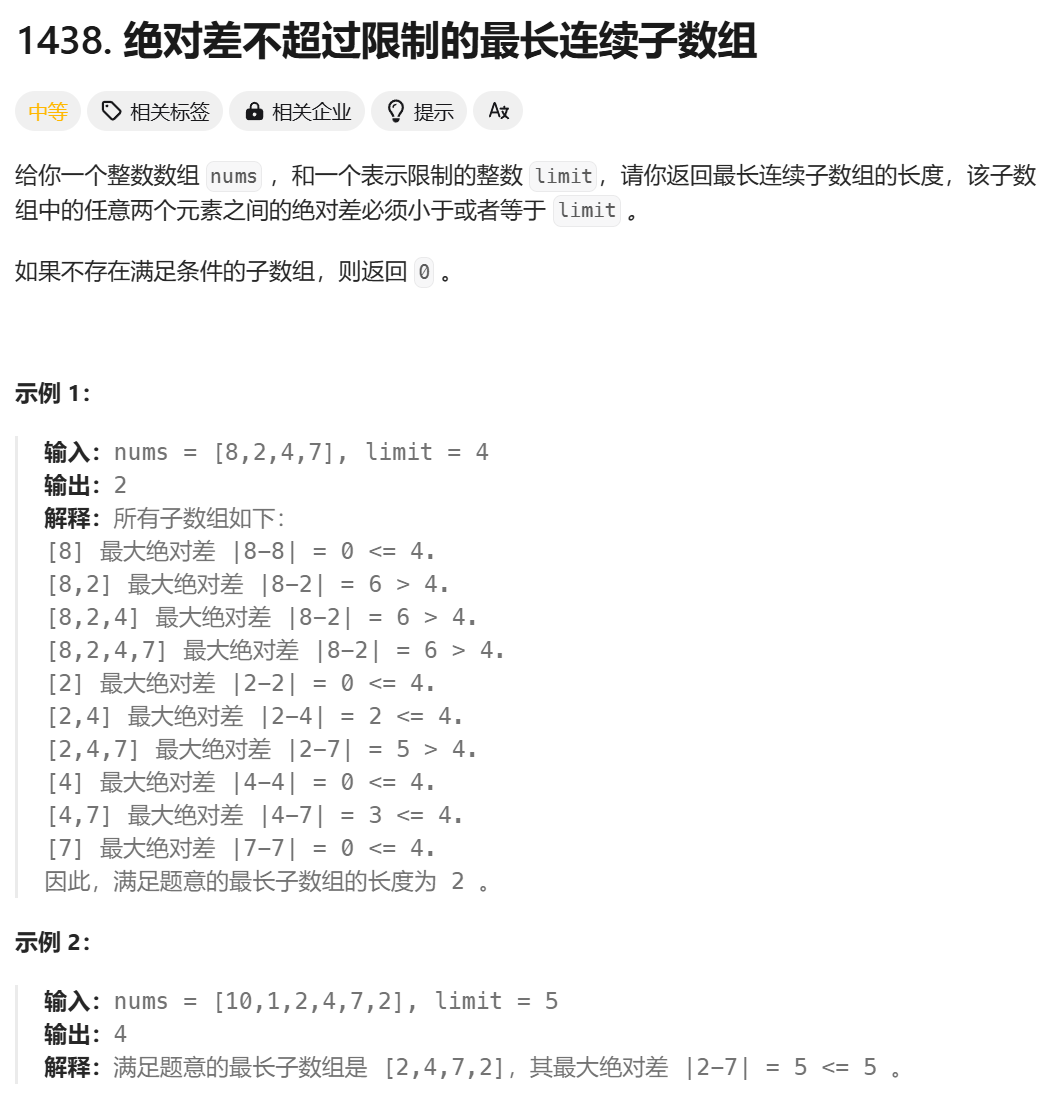

显然，使用滑动窗口，维护当前窗口的的最大值和最小值是解决这个问题的关键。

既然是维护，那就要考虑，当窗口扩大时，那来一个新的值是很容易知道是否是最大值或者是最小值，即维护起来是简单直观的。 但是，当窗口减小时，假如从窗口出去的是最大值，或者是最小值，那么窗口缩小以后的最小值或者最大值是啥呢。所以相对窗口增大再次判断最值不容易想出来。

实际上，这个维护窗口的最值问题，是一个非常经典的问题，归纳出来一种普遍认为比较好用的方法，就是使用单调队列。 因为单调队列保持了队列中元素之间的固有的顺序，同时也维护了单调性。这样，当窗口减小时，我们非常容易知道下一个最值是多少。

但是，单调队列只能维护一种单调性，而题目又要求我们同时考虑最大值和最小值的差，所以就用两个呗，后边的解决方法也就顺其自然了。

- python中的队列可以调用collections.deque
- 创建:q = deque()
- 询问队列是否非空:if q:
- 队尾入队: q.append()
- 队尾出队: q.pop()
- 队首入队: q.appendleft()
- 队首出队: q.popleft()
- 询问队尾: q[-1]
- 询问队首: q[0]


- 单调递减队列是队首为最大值
  - 然后每当出现一个新的，将从队尾开始入手（后面）然后将之前老的，小的弹出（后面肯定用不到了）

In [ ]:
from collections import deque
from typing import List

class Solution:
    def longestSubarray(self, nums: List[int], limit: int) -> int:
        q1, q2 = deque(), deque()
        l, res = 0, 0

        for r, x in enumerate(nums):

        # 维护 q1 为单调递减队列（最大值）把后面的老东西弹出去
            while q1 and x > nums[q1[-1]]:  
                q1.pop()
            q1.append(r)
            # 维护 q2 为单调递增队列（最小值）
            while q2 and x < nums[q2[-1]]:  
                q2.pop()
            q2.append(r)

            # 相当于清空队首老东西
            while q1 and q2 and nums[q1[0]] - nums[q2[0]] > limit:
                if l == q1[0]:
                    q1.popleft()
                if l == q2[0]:
                    q2.popleft()
                l += 1

            # 更新最长子数组的长度
            res = max(res, r - l + 1)  

        return res


